# Bayesian inference of model parameters (Gaussian Noise)

The goal is to find the posterior probability distribution function (PDF) of the model parameters $ \theta $ given the observed data $ D $ and a chosen model class $ M $:

$ p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D | M)} $ (1.19)

Where:
*   $ p(\theta | D, M) $: **Posterior PDF** - Our updated belief about $ \theta $ after seeing the data $ D $, assuming model $ M $.
*   $ p(D | \theta, M) $: **Likelihood Function** - The probability (or density) of observing data $ D $ given specific parameters $ \theta $ and model $ M $.
*   $ p(\theta | M) $: **Prior PDF** - Our initial belief about $ \theta $ before seeing data $ D $, assuming model $ M $.
*   $ p(D | M) $: **Evidence (or Marginal Likelihood)** - The probability (or density) of observing data $ D $ under model $ M $, averaged over all possible $ \theta $. It acts as a normalization constant.

**Concrete Example: estimating the true mean of a process when measurements are subject to Gaussian noise, and we assume the noise level (standard deviation) is known.**

Imagine we are measuring a physical constant, say a voltage $ \mu $, using an instrument. We know from the instrument's specifications that measurements have random noise which follows a Normal (Gaussian) distribution with a known standard deviation $ \sigma $. We take several measurements $ D = \{x_1, x_2, ..., x_n\} $ and want to infer the posterior distribution for the true voltage $ \mu $.

*   **Model $ M $**: The measurement process is described by a Gaussian distribution with unknown mean $ \mu $ and *known* standard deviation $ \sigma $. $ x_i \sim \mathcal{N}(\mu, \sigma^2) $.
*   **Parameter $ \theta $**: The single parameter we want to estimate is the true mean voltage, $ \theta = \mu $. The possible values are $ \mu \in (-\infty, \infty) $.
*   **Data $ D $**: A set of $ n $ voltage measurements $ \{x_1, x_2, ..., x_n\} $.


**The Bayesian Update Equation:**

We still use Bayes' theorem:
$ p(\mu | D, M) = \frac{p(D | \mu, M) p(\mu | M)}{p(D | M)} $

Let's generate some synthetic data and define our prior belief.

--- Scenario ---
Known measurement noise σ: 0.8
Number of data points n: 10
Observed data D: [5.4  4.89 5.52 6.22 4.81 4.81 6.26 5.61 4.62 5.43]
Sample mean x̄: 5.358


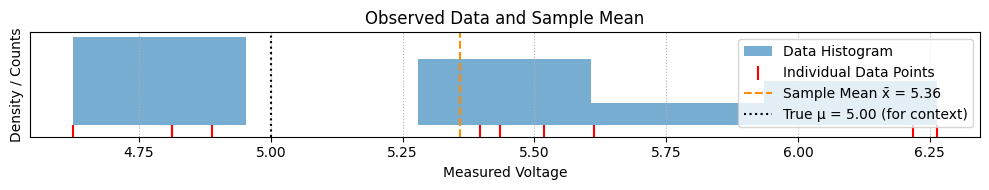

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad # For numerical integration if needed

# --- Scenario Setup ---
# True value (unknown to the inference process, used for data generation)
true_mu = 5.0
# Known standard deviation of measurements
known_sigma = 0.8
# Number of measurements
n_data_points = 10

# Generate synthetic data D
np.random.seed(42) # for reproducibility
data_D = norm.rvs(loc=true_mu, scale=known_sigma, size=n_data_points)

# Calculate sample mean (useful statistic)
sample_mean = np.mean(data_D)

print(f"--- Scenario ---")
print(f"Known measurement noise σ: {known_sigma}")
print(f"Number of data points n: {n_data_points}")
print(f"Observed data D: {np.round(data_D, 2)}")
print(f"Sample mean x̄: {sample_mean:.3f}")

# Range of mu values for calculation and plotting
mu_range = np.linspace(true_mu - 3*known_sigma, true_mu + 3*known_sigma, 500)

# --- Visualization 1: The Data ---
plt.figure(figsize=(10, 2))
plt.hist(data_D, bins=5, density=True, alpha=0.6, label='Data Histogram')
plt.scatter(data_D, np.zeros_like(data_D) - 0.1, marker='|', color='red', s=100, label='Individual Data Points')
plt.axvline(sample_mean, color='darkorange', linestyle='--', label=f'Sample Mean x̄ = {sample_mean:.2f}')
plt.axvline(true_mu, color='black', linestyle=':', label=f'True μ = {true_mu:.2f} (for context)')
plt.title('Observed Data and Sample Mean')
plt.xlabel('Measured Voltage')
plt.ylabel('Density / Counts')
plt.legend()
plt.yticks([])
plt.grid(axis='x', linestyle=':')
plt.tight_layout()
plt.show()

--- Scenario ---
Known measurement noise σ: 0.8
Number of data points n: 10
Observed data D: [5.4  4.89 5.52 6.22 4.81 4.81 6.26 5.61 4.62 5.43]
Sample mean x̄: 5.358


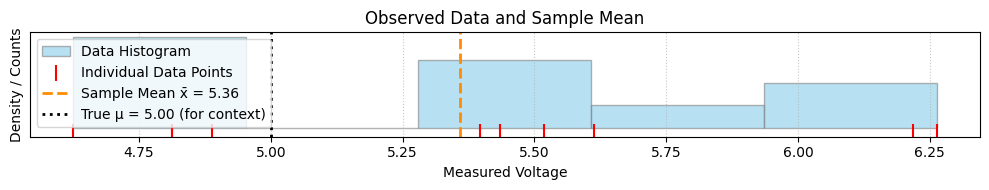

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad # For numerical integration if needed

# --- Scenario Setup ---
# True value (unknown to the inference process, used for data generation)
true_mu = 5.0
# Known standard deviation of measurements
known_sigma = 0.8
# Number of measurements
n_data_points = 10

# Generate synthetic data D
np.random.seed(42) # for reproducibility
data_D = norm.rvs(loc=true_mu, scale=known_sigma, size=n_data_points)

# Calculate sample mean (useful statistic)
sample_mean = np.mean(data_D)

print(f"--- Scenario ---")
print(f"Known measurement noise σ: {known_sigma}")
print(f"Number of data points n: {n_data_points}")
print(f"Observed data D: {np.round(data_D, 2)}")
print(f"Sample mean x̄: {sample_mean:.3f}")

# Range of mu values for calculation and plotting
mu_range = np.linspace(true_mu - 3*known_sigma, true_mu + 3*known_sigma, 500)

# --- Visualization 1: The Data ---
plt.figure(figsize=(10, 2))
plt.hist(data_D, bins='auto', density=True, alpha=0.6, label='Data Histogram', color='skyblue', edgecolor='gray')
plt.scatter(data_D, np.full_like(data_D, -0.05), marker='|', color='red', s=120, label='Individual Data Points')
plt.axvline(sample_mean, color='darkorange', linestyle='--', linewidth=2, label=f'Sample Mean x̄ = {sample_mean:.2f}')
plt.axvline(true_mu, color='black', linestyle=':', linewidth=2, label=f'True μ = {true_mu:.2f} (for context)')
plt.title('Observed Data and Sample Mean')
plt.xlabel('Measured Voltage')
plt.ylabel('Density / Counts')
plt.legend(loc='upper left')
plt.yticks([])
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

## 1. Prior PDF: $ p(\mu | M) $

This is our belief about the true voltage $ \mu $ *before* seeing the measurements $ D $. Since $ \mu $ can be any real number, a common choice is a Gaussian prior. Let's assume we have some prior knowledge suggesting $ \mu $ is likely around 4.0, with some uncertainty, say $ \mu \sim \mathcal{N}(\mu_0, \sigma_0^2) $.

*   **Meaning**: Our initial guess for $ \mu $ is centered around $ \mu_0=4.0 $ with a standard deviation of $ \sigma_0=1.0 $.
*   **Mathematical Form**: $ p(\mu | M) = \mathcal{N}(\mu | \mu_0, \sigma_0^2) = \frac{1}{\sqrt{2\pi\sigma_0^2}} \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right) $.



--- 1. Prior PDF p(μ|M) ---
Prior distribution: N(μ₀=4.0, σ₀²=1.00)


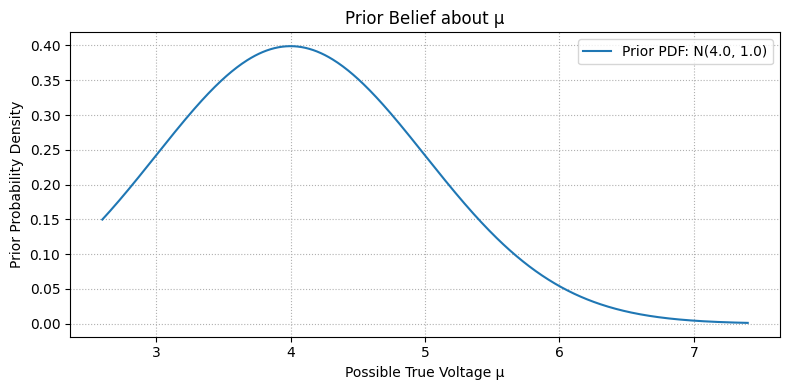

In [2]:
print("\n--- 1. Prior PDF p(μ|M) ---")
# Prior hyperparameters (mean mu_0, standard deviation sigma_0)
mu_prior = 4.0
sigma_prior = 1.0

# Function to calculate prior PDF value(s)
def prior_pdf(mu, mu_0, sigma_0):
  """Calculates the Gaussian prior PDF for given mu."""
  return norm.pdf(mu, loc=mu_0, scale=sigma_0)

# Calculate prior density over the range
prior_values = prior_pdf(mu_range, mu_prior, sigma_prior)

print(f"Prior distribution: N(μ₀={mu_prior}, σ₀²={sigma_prior**2:.2f})")

# --- Visualization 2: Prior Distribution ---
plt.figure(figsize=(8, 4))
plt.plot(mu_range, prior_values, label=f'Prior PDF: N({mu_prior}, {sigma_prior**2:.1f})')
plt.title('Prior Belief about μ')
plt.xlabel('Possible True Voltage μ')
plt.ylabel('Prior Probability Density')
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

## 2. Likelihood Function: $ p(D | \mu, M) $

This is the probability (density) of observing our specific data set $ D = \{x_1, ..., x_n\} $ given a *particular* hypothesized value for the true mean $ \mu $ (and the known $ \sigma $). Since measurements are independent, it's the product of the individual probabilities.

*   **Meaning**: How well does a specific hypothesis $ \mu $ explain the observed data $ D $? Higher values indicate that $ \mu $ makes the observed data more probable.
*   **Mathematical Form**:
    $ p(D | \mu, M) = \prod_{i=1}^n p(x_i | \mu, M) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) $
    $ p(D | \mu, M) = \left(\frac{1}{2\pi\sigma^2}\right)^{n/2} \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2\right) $
    As a function of $ \mu $, this is proportional to a Gaussian centered at the sample mean $ \bar{x} $ with variance $ \sigma^2 / n $. Specifically, $ p(D|\mu, M) \propto \exp\left(-\frac{n(\mu - \bar{x})^2}{2\sigma^2}\right) $.


--- 2. Likelihood Function p(D|μ,M) ---
Known measurement σ: 0.8
Likelihood is proportional to N(μ | x̄, σ²/n)
Variance of likelihood function shape σ²/n = 0.064
Likelihood peaks near μ = x̄ = 5.358
Numerically found peak (MLE estimate): 5.361


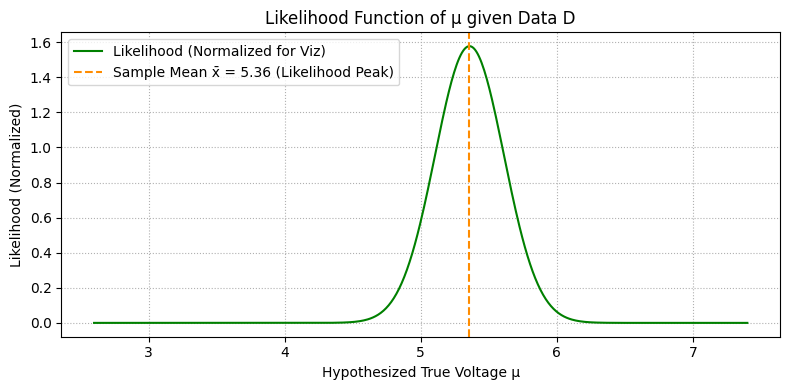

In [3]:
print("\n--- 2. Likelihood Function p(D|μ,M) ---")

# Function to calculate likelihood value(s)
# Note: Calculating the product directly can lead to underflow for large n.
# Using sum of logs is more stable numerically, but here we compute the direct product.
def likelihood_func(data, mu, sigma):
  """Calculates the likelihood P(data|mu) assuming known sigma."""
  # Calculate log-likelihood first for stability
  log_likelihood = np.sum(norm.logpdf(data, loc=mu, scale=sigma))
  # Return exponentiated value - may still underflow if log_likelihood is very negative
  # For visualization, we often only care about the shape, so normalization might be applied later.
  return np.exp(log_likelihood)
  # # Simpler, less stable version:
  # return np.prod(norm.pdf(data, loc=mu, scale=sigma))


# Calculate likelihood values over the range of mu
# Use a vectorized approach for efficiency
likelihood_values = np.array([likelihood_func(data_D, mu_i, known_sigma) for mu_i in mu_range])

# Find the Maximum Likelihood Estimate (MLE) - where likelihood peaks
mle_mu_estimate = mu_range[np.argmax(likelihood_values)]
# Analytically, the MLE for mu in a Gaussian with known sigma is the sample mean
analytical_mle_mu = sample_mean

print(f"Known measurement σ: {known_sigma}")
print(f"Likelihood is proportional to N(μ | x̄, σ²/n)")
print(f"Variance of likelihood function shape σ²/n = {known_sigma**2 / n_data_points:.3f}")
print(f"Likelihood peaks near μ = x̄ = {analytical_mle_mu:.3f}")
print(f"Numerically found peak (MLE estimate): {mle_mu_estimate:.3f}")


# --- Visualization 3: Likelihood Function ---
# Normalize likelihood for visualization alongside prior/posterior PDF
likelihood_normalized = likelihood_values / np.trapz(likelihood_values, mu_range)

plt.figure(figsize=(8, 4))
plt.plot(mu_range, likelihood_normalized, label='Likelihood (Normalized for Viz)', color='green')
plt.axvline(sample_mean, color='darkorange', linestyle='--', label=f'Sample Mean x̄ = {sample_mean:.2f} (Likelihood Peak)')
plt.title('Likelihood Function of μ given Data D')
plt.xlabel('Hypothesized True Voltage μ')
plt.ylabel('Likelihood (Normalized)')
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

## 3. Evidence (Marginal Likelihood): $ p(D | M) $

This is the probability of observing the data $ D $ under model $ M $, integrated (marginalized) over all possible parameter values $ \mu $. It acts as the normalization constant in Bayes' theorem, ensuring the posterior PDF integrates to 1.

*   **Meaning**: How likely is the observed data $ D $ overall, considering our model $ M $ and our prior beliefs about $ \mu $? It's a single number, not a function of $ \mu $.
*   **Mathematical Form**: $ p(D | M) = \int_{-\infty}^{\infty} p(D | \mu, M) p(\mu | M) d\mu $

For the Gaussian-Gaussian case (Gaussian likelihood with known variance, Gaussian prior), this integral has a closed-form solution. The data $ D $ (summarized by $ n $ and $ \bar{x} $) is marginally distributed as:
$ p(D|M) \propto \mathcal{N}(\bar{x} | \mu_0, \sigma_0^2 + \sigma^2/n) $
The exact calculation involves the normalization constants. Alternatively, we can calculate it using the identity $ p(D|M) = \frac{p(D|\mu, M)p(\mu|M)}{p(\mu|D, M)} $ at any value of $ \mu $, once we know the posterior.

In [ ]:
print("\n--- 3. Evidence p(D|M) ---")

# We will calculate the evidence *after* finding the posterior parameters,
# using the identity p(D|M) = Likelihood * Prior / Posterior at a specific mu.
# Alternatively, perform numerical integration (can be slow/less accurate):
integrand = lambda mu: likelihood_func(data_D, mu, known_sigma) * prior_pdf(mu, mu_prior, sigma_prior)
evidence_numerical, numerical_error = quad(integrand, mu_range[0], mu_range[-1]) # Integrate over our plotted range

# Note: Numerical integration over a finite range is an approximation.
# The analytical solution is preferred if available.

print(f"Evidence p(D|M) (estimated by numerical integration): {evidence_numerical:.4e}")
print(f"(Numerical integration error estimate: {numerical_error:.2e})")
# We will compute a more precise value after deriving the posterior.

In [7]:
print("\n--- 3. Evidence p(D|M) ---")

# We will calculate the evidence *after* finding the posterior parameters,
# using the identity p(D|M) = Likelihood * Prior / Posterior at a specific mu.
# Alternatively, perform numerical integration (can be slow/less accurate):
integrand = lambda mu: likelihood_func(data_D, mu, known_sigma) * prior_pdf(mu, mu_prior, sigma_prior)
evidence_numerical, numerical_error = quad(integrand, mu_range[0], mu_range[-1]) # Integrate over our plotted range

# Note: Numerical integration over a finite range is an approximation.
# The analytical solution is preferred if available.

print(f"Evidence p(D|M) (estimated by numerical integration): {evidence_numerical:.4e}")
print(f"(Numerical integration error estimate: {numerical_error:.2e})")
# We will compute a more precise value after deriving the posterior.


--- 3. Evidence p(D|M) ---
Evidence p(D|M) (estimated by numerical integration): 9.3239e-06
(Numerical integration error estimate: 3.07e-11)


## 4. Posterior PDF: $ p(\mu | D, M) $

This is our updated belief about $ \mu $ after considering the data $ D $. It combines the prior belief with the information from the likelihood.

*   **Meaning**: Given the observed measurements, what is the resulting probability distribution for the true voltage $ \mu $?
*   **Mathematical Form**: $ p(\mu | D, M) = \frac{p(D | \mu, M) p(\mu | M)}{p(D | M)} $

For the Gaussian prior $ \mathcal{N}(\mu_0, \sigma_0^2) $ and Gaussian likelihood (proportional to $ \mathcal{N}(\mu | \bar{x}, \sigma^2/n) $), the posterior is also Gaussian: $ p(\mu | D, M) = \mathcal{N}(\mu | \mu_n, \sigma_n^2) $.
The posterior parameters are calculated as follows:
*   **Posterior Precision**: $ \frac{1}{\sigma_n^2} = \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2} $ (Sum of prior precision and data precision)
*   **Posterior Mean**: $ \mu_n = \sigma_n^2 \left( \frac{\mu_0}{\sigma_0^2} + \frac{n \bar{x}}{\sigma^2} \right) $ (Precision-weighted average of prior mean and sample mean)


--- 4. Posterior PDF p(μ|D,M) ---
Posterior distribution: N(μₙ=5.277, σₙ²=0.060)
Posterior standard deviation σₙ: 0.245

Evidence p(D|M) calculated via identity: 9.3239e-06
(Comparing with numerical value: 9.3239e-06)

--- Verification at μ = 5.277 ---
Likelihood * Prior: 1.5167e-05
Evidence: 9.3239e-06
Posterior calculated via Bayes' Thm: 1.6266
Posterior from N(5.277,0.060) PDF: 1.6266


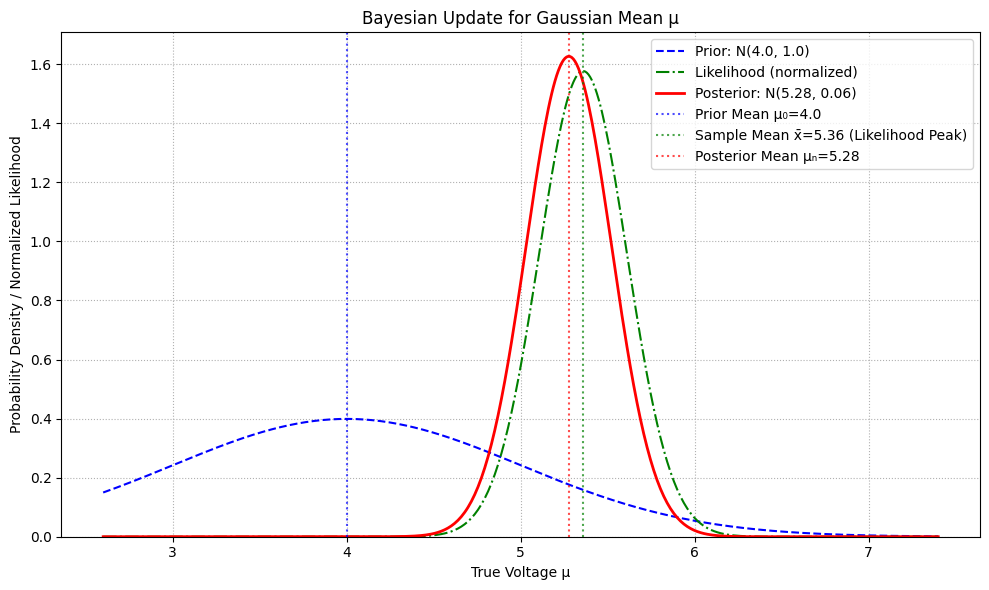

In [5]:
print("\n--- 4. Posterior PDF p(μ|D,M) ---")

# Calculate posterior parameters (mean mu_n, variance sigma_n^2)
prior_precision = 1.0 / (sigma_prior**2)
data_precision = n_data_points / (known_sigma**2)

posterior_precision = prior_precision + data_precision
posterior_variance = 1.0 / posterior_precision
posterior_sigma = np.sqrt(posterior_variance)

posterior_mean = posterior_variance * (prior_precision * mu_prior + data_precision * sample_mean)

# Function to calculate posterior PDF value(s)
def posterior_pdf(mu, mu_n, sigma_n):
  """Calculates the Gaussian posterior PDF."""
  return norm.pdf(mu, loc=mu_n, scale=sigma_n)

# Calculate posterior density over the range
posterior_values = posterior_pdf(mu_range, posterior_mean, posterior_sigma)

print(f"Posterior distribution: N(μₙ={posterior_mean:.3f}, σₙ²={posterior_variance:.3f})")
print(f"Posterior standard deviation σₙ: {posterior_sigma:.3f}")

# --- Now calculate Evidence using the identity ---
# Choose a convenient point, e.g., the posterior mean
mu_eval_point = posterior_mean
likelihood_at_eval = likelihood_func(data_D, mu_eval_point, known_sigma)
prior_at_eval = prior_pdf(mu_eval_point, mu_prior, sigma_prior)
posterior_at_eval = posterior_pdf(mu_eval_point, posterior_mean, posterior_sigma)

# Avoid division by zero if posterior_at_eval is tiny
if posterior_at_eval > 1e-100:
    evidence_analytical = (likelihood_at_eval * prior_at_eval) / posterior_at_eval
    print(f"\nEvidence p(D|M) calculated via identity: {evidence_analytical:.4e}")
    # Compare with numerical integration result
    print(f"(Comparing with numerical value: {evidence_numerical:.4e})")
else:
    evidence_analytical = evidence_numerical # Fallback if calculation failed
    print("\nWarning: Could not calculate evidence via identity accurately, using numerical value.")
    print(f"Evidence p(D|M) (using numerical integration): {evidence_analytical:.4e}")


# --- Verification: Check Bayes' Theorem calculation at one point ---
numerator_at_eval = likelihood_at_eval * prior_at_eval
posterior_calculated = numerator_at_eval / evidence_analytical

print(f"\n--- Verification at μ = {mu_eval_point:.3f} ---")
print(f"Likelihood * Prior: {numerator_at_eval:.4e}")
print(f"Evidence: {evidence_analytical:.4e}")
print(f"Posterior calculated via Bayes' Thm: {posterior_calculated:.4f}")
print(f"Posterior from N({posterior_mean:.3f},{posterior_variance:.3f}) PDF: {posterior_at_eval:.4f}")
# These last two values should be very close.

# --- Visualization 4: Prior, Likelihood, and Posterior ---
plt.figure(figsize=(10, 6))
plt.plot(mu_range, prior_values, label=f'Prior: N({mu_prior:.1f}, {sigma_prior**2:.1f})', color='blue', linestyle='--')
plt.plot(mu_range, likelihood_normalized, label='Likelihood (normalized)', color='green', linestyle='-.')
plt.plot(mu_range, posterior_values, label=f'Posterior: N({posterior_mean:.2f}, {posterior_variance:.2f})', color='red', linewidth=2)

# Add vertical lines for means
plt.axvline(mu_prior, color='blue', linestyle=':', alpha=0.7, label=f'Prior Mean μ₀={mu_prior:.1f}')
plt.axvline(sample_mean, color='green', linestyle=':', alpha=0.7, label=f'Sample Mean x̄={sample_mean:.2f} (Likelihood Peak)')
plt.axvline(posterior_mean, color='red', linestyle=':', alpha=0.7, label=f'Posterior Mean μₙ={posterior_mean:.2f}')

plt.title('Bayesian Update for Gaussian Mean μ')
plt.xlabel('True Voltage μ')
plt.ylabel('Probability Density / Normalized Likelihood')
plt.grid(True, linestyle=':')
plt.legend()
plt.ylim(bottom=0) # Ensure y-axis starts at 0
plt.tight_layout()
plt.show()

**Summary of the Visualization:**

1.  **Data Plot:** Shows the spread of our measurements and where the sample mean lies.
2.  **Prior Plot:** Visualizes our initial belief about $ \mu $ before seeing data.
3.  **Likelihood Plot:** Shows which values of $ \mu $ are most consistent with the observed data. Note it's peaked at the sample mean $ \bar{x} $. We normalized it just for visual comparison with PDFs.
4.  **Combined Plot:** This is the key visualization.
    *   The **Prior** (blue dashed) is our starting point.
    *   The **Likelihood** (green dash-dot, normalized) represents the evidence from the data. It "pulls" the belief towards the sample mean.
    *   The **Posterior** (red solid) is the final result. It's a compromise between the prior and the likelihood, weighted by their respective precisions (inverse variances). Notice the posterior is narrower than both the prior and the likelihood function (when viewed as a function of $ \mu $ with variance $ \sigma^2/n $), reflecting increased certainty gained from combining prior knowledge and data. The posterior mean lies between the prior mean and the sample mean.